In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
print(os.getcwd())
df = pd.read_csv("../data/medical_insurance.csv")

/home/parnian/IMT/parnian_lali/src


In [9]:
df.shape

(1338, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [11]:
df.describe()

,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


<ipython-input-12-9d40824bcff0>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i + 1)


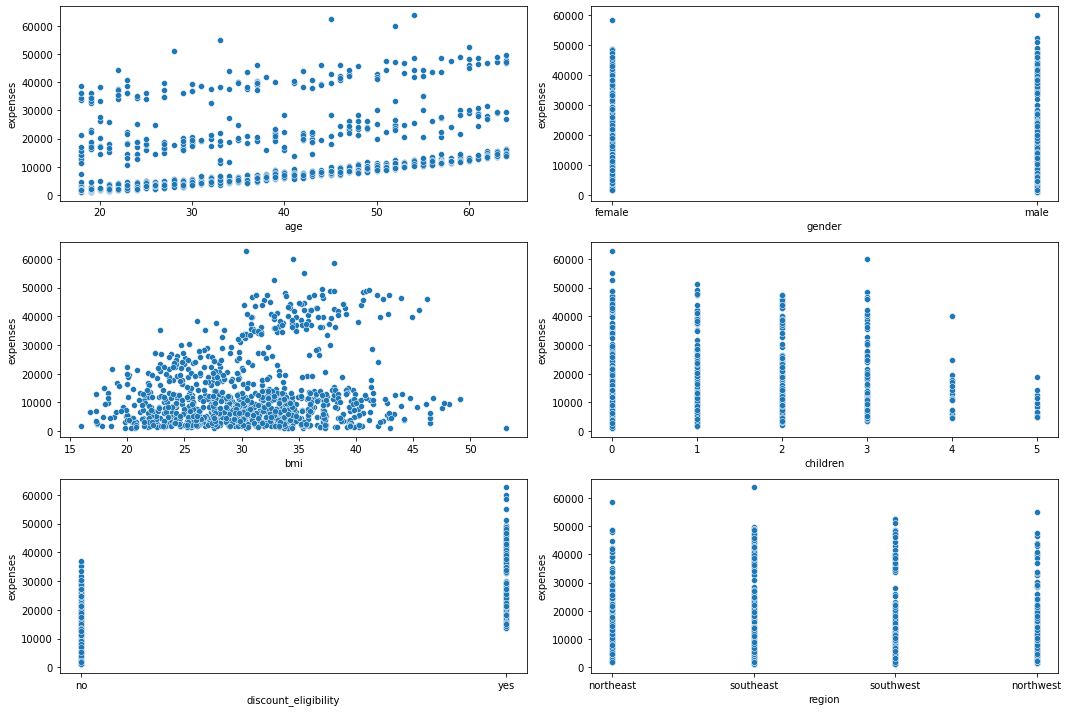

In [12]:
features = ['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region']
plt.subplots(figsize=(15, 10))
for i, j in enumerate(features):
    plt.subplot(3, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=j, y='expenses', data=x)
plt.tight_layout()
plt.show()

<ipython-input-13-181373279530>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i + 1)


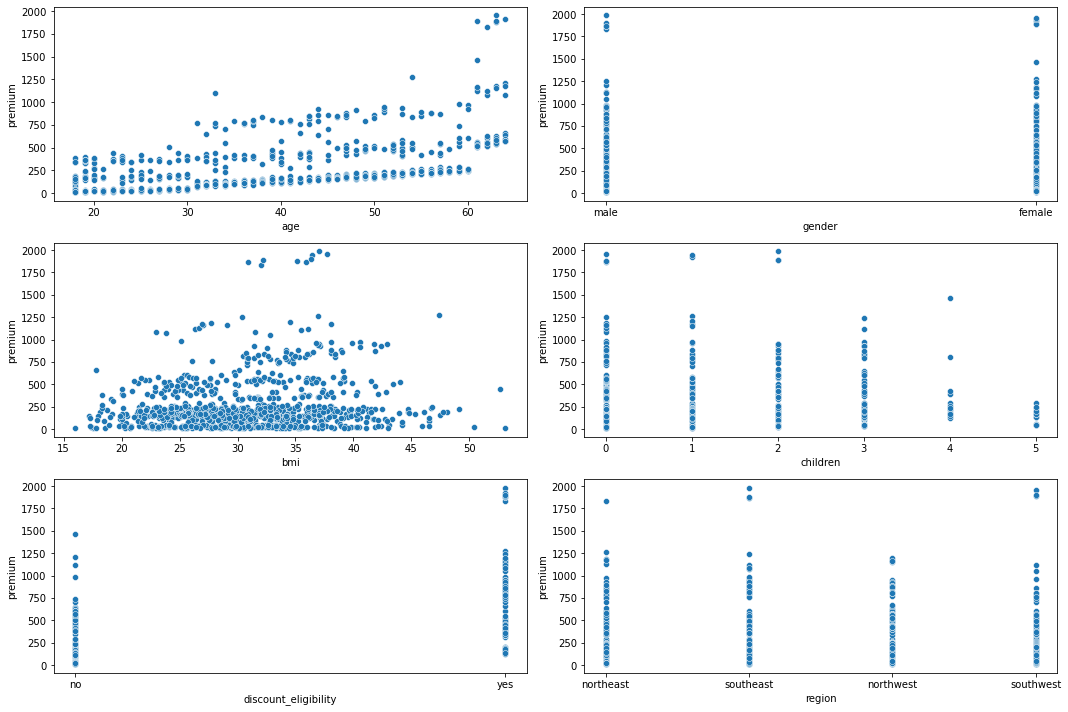

In [13]:
features = ['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region']
plt.subplots(figsize=(15, 10))
for i, j in enumerate(features):
    plt.subplot(3, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=j, y='premium', data=x)
plt.tight_layout()
plt.show()

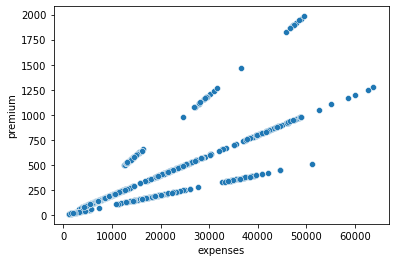

In [14]:

sb.scatterplot(x='expenses', y='premium', data=df)
plt.show()

<ipython-input-15-dbae5b4cb6b7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


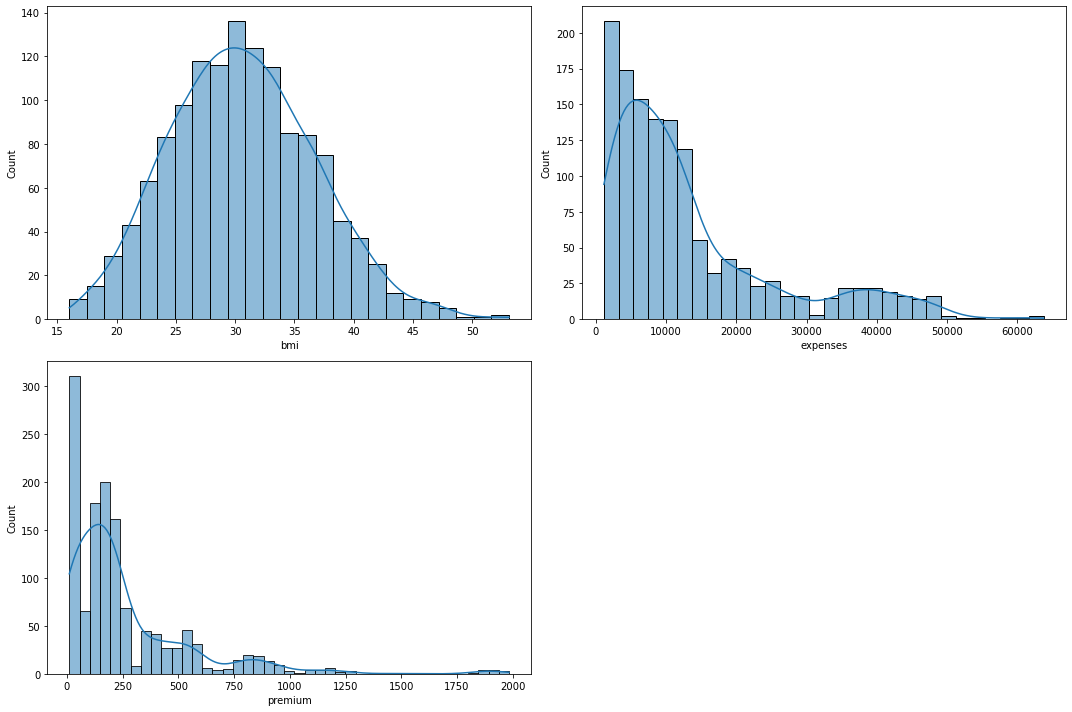

In [15]:
features = df.select_dtypes(include='float').columns
plt.subplots(figsize=(15, 10))
for i, j in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.histplot(df[j], kde=True)
plt.tight_layout()
plt.show()

In [16]:
df.replace({
    'gender':{'female': 1, 'male': 0},
    'discount_eligibility': {'yes': 1, 'no': 0}, 
    'region': {'southwest': 1, 'northwest': 2, 'southeast': 3, 'northeast': 4}
    }, inplace=True)
df.head()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,1,27.9,0,1,1,16884.92,168.8492
1,18,0,33.8,1,0,3,1725.55,17.2555
2,28,0,33.0,3,0,3,4449.46,44.4946
3,33,0,22.7,0,0,2,21984.47,439.6894
4,32,0,28.9,0,0,2,3866.86,77.3372


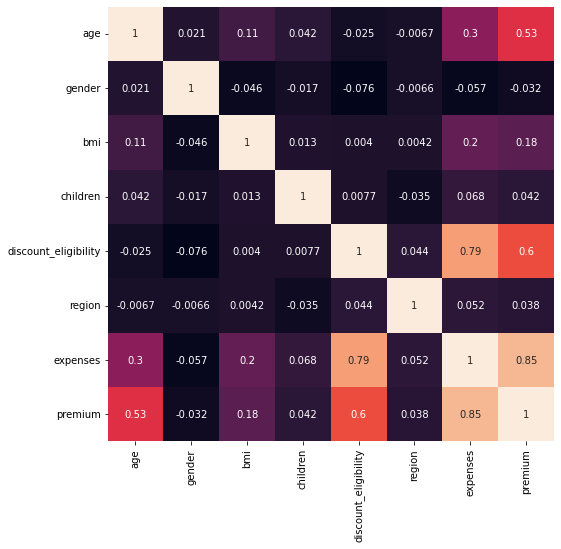

In [17]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

**Summary of data analysis results**

BMI has approximatly a normal distribution and from correlations between features in graphs and specially heatmap we can obtain relationship between them:

*high correlations:* <br>
age & minum, discount_eligibility & expenses, discount_eligilibity & preminum, expenses & premium, premium & age

*low correlations:*<br>
I can see that gender has very very small and negative correlation so i deside to omit this feature.